![ALT_TEXT_FOR_SCREEN_READERS](./header.png)

# Exercise 2 IRIS Classification

The goal of the exercise is to estimate the species of an iris flower using 4 features. For this we use 
different classification methods.
We use a data set by Edgar Anderson or R. Fischer from 1936 [1][2]. The dataset contains 150 samples, each with
4 measured values petal length, petal width, sepal length, sepal width as features and the correct class as label.  

```
[1] Edgar Anderson (1936). "The species problem in Iris". Annals of the Missouri Botanical Garden. 23 (3): 457–509. doi:10.2307/2394164. JSTOR 2394164.
[2] R. A. Fisher, “The use of multiple measurements in taxonomic problems,” Ann. Eugen., vol. 7, no. 2, pp. 179–188, 1936.
```


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ditomax/mlexercises/blob/master/02%20Exercise%20classification%20of%20IRIS%20flowers.ipynb)


## Considerations

- Implement the exercise in **python** language
- Use the sklearn module of python
- You are allowed to use generative models to create your code
- You can implement the exercise in a local notebook or in a hosted colab notebook
- When you are using a local notebook, please create a copy of this notebook with a different name
- The code has to be included in the resulting print of the notebook
- Some results have to be documented and commented in the notebook in the table at the end of the notebook
- In order to support me finding the places where you fulfill the requirements. Please **mark** the code parts that related to a requirement with the **Rx** mark. E.g. **R0 near the download code**.

## Requirements

- R0: Load the dataset into memory (e.g. sklearn has a ready made function to load IRIS) (10%)
- R1: Print the shapes of the data (10%)
- R2: Display 10 samples of the features and the labels (10%)
- R3: Plot a histogram of the classes of the data (10%)
- R4: Separate features and labels (10%)
- R5: Separate training and test data (80%+20%), take care for stratification (10%)
- R6: Train a k-nearest neighbor classifier and measure the F1 score (10%)
- R7: Print the confusion matrix and explain the observation (10%)
- R8: Train and measure the quality of a random forest tree classifier (10%)
- R9: Train multiple versions of the knn model using different n_neighbors parameters and find the best value for n_neighbors (10%) 

# Implementation

In [37]:
#
# Turn off some warnings
#
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)

#
# Import modules
#
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [38]:
# R0
iris = load_iris()

In [39]:
# R4
x = iris.data
y = iris.target

In [40]:
# R1
x.shape

(150, 4)

In [41]:
# R1
y.shape

(150,)

In [59]:
# R2
print(x[-10:])

[[6.7 3.1 5.6 2.4]
 [6.9 3.1 5.1 2.3]
 [5.8 2.7 5.1 1.9]
 [6.8 3.2 5.9 2.3]
 [6.7 3.3 5.7 2.5]
 [6.7 3.  5.2 2.3]
 [6.3 2.5 5.  1.9]
 [6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


In [43]:
print(y[0:10])

[0 0 0 0 0 0 0 0 0 0]


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

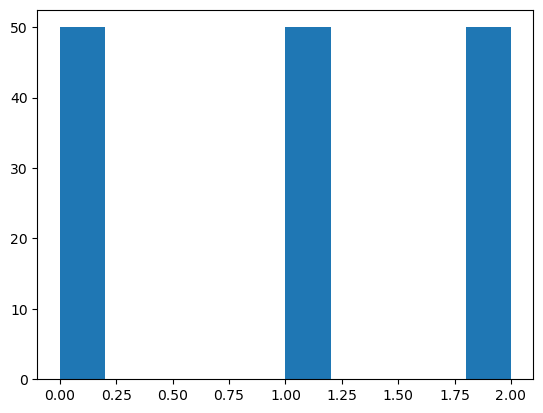

In [44]:
# R3
plt.hist(y)

In [45]:
# R5

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)

In [70]:
# R6 kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
from sklearn.metrics import f1_score

In [72]:
y_test_pred = knn_classifier.predict(x_test)

In [73]:
f1_knn = f1_score(y_test, y_test_pred, average='macro')

In [74]:
f1_knn

0.9743209876543211

In [75]:
# R7
print(confusion_matrix(y_test, y_test_pred))

[[12  0  0]
 [ 0 13  0]
 [ 0  1 12]]


In [76]:
# R8
tree_classifier = RandomForestClassifier(n_estimators=100)
tree_classifier.fit(x_train,y_train)
y_test_pred = tree_classifier.predict(x_test)
f1_rfc = f1_score(y_test, y_test_pred, average='macro')

In [77]:
f1_rfc

0.9229629629629629

In [78]:
print(confusion_matrix(y_test, y_test_pred))

[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]


In [79]:
# R9

for neighbors in range(3,20):
    knn_classifier = KNeighborsClassifier(n_neighbors=neighbors)
    knn_classifier.fit(x_train, y_train)
    y_test_pred = knn_classifier.predict(x_test)
    f1_knn = f1_score(y_test, y_test_pred, average='macro')
    print('f1 score {:.04f} for n_neighbors {}'.format(f1_knn,neighbors) )

f1 score 0.9743 for n_neighbors 3
f1 score 0.9743 for n_neighbors 4
f1 score 0.9743 for n_neighbors 5
f1 score 0.9484 for n_neighbors 6
f1 score 0.9484 for n_neighbors 7
f1 score 0.9484 for n_neighbors 8
f1 score 0.9743 for n_neighbors 9
f1 score 0.9743 for n_neighbors 10
f1 score 0.9743 for n_neighbors 11
f1 score 0.9743 for n_neighbors 12
f1 score 0.9487 for n_neighbors 13
f1 score 0.9487 for n_neighbors 14
f1 score 0.9487 for n_neighbors 15
f1 score 0.9487 for n_neighbors 16
f1 score 0.9487 for n_neighbors 17
f1 score 0.9487 for n_neighbors 18
f1 score 0.9487 for n_neighbors 19


# Results

| Requirement  | F1  | Comment | 
|---|---|---|
| R6  | 0.974  | with random state 42  |
| R8  | 0.896  | with 100 estimators  | 
| R9  | 0.974  | n_neigbors=3  | 
